#  Analysis Report of Real time Data through Time series

In [1]:
## author- KUMAR ABHINAV
## DATE- 6/6/18
import pandas as pd
import numpy as np
import os
file_path=os.getcwd()

In [2]:
print('file_path:'+file_path)
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25, 10
import matplotlib.pyplot as plt
from matplotlib import pyplot

file_path:C:\Users\Lenovo\AnacondaProjects\cyrrup


In [3]:
df=pd.read_csv(r"C:\Users\Lenovo\AnacondaProjects\cyrrup\dataset\1.0.csv")


In [4]:
df.head()

,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
0,1,1.0,2018-01-24 19:48:01,0580fc300340fcd8ce00dbcc0000000000000000000000...,39.6328,13.506,26.0,0.0,42.3529,24.0,38.0,0.0,0.0,1223.25,3.0,0.5,15.6863
1,1,1.0,2018-01-24 19:48:02,0520fc4003b8fed8d506d9cc04dfca02dccbfdd4cffdda...,38.3364,13.506,27.0,0.0,34.5098,24.0,36.0,0.0,0.0,1180.00,2.0,2.5,15.6863
2,1,1.0,2018-01-24 19:48:03,0568fc1802d802d8d103d4d203dbcafcddc8fdd9cdfddb...,52.0412,13.643,27.0,0.0,34.9020,24.0,45.0,0.0,0.0,1155.75,0.0,23.0,17.2549
3,1,1.0,2018-01-24 19:48:04,04e8fbf803b005d8c504d5c9ffd7cbfddad205d2ce02d5...,51.4856,13.652,27.0,0.0,27.8431,24.0,29.0,0.0,0.0,1820.75,0.0,23.0,15.6863
4,1,1.0,2018-01-24 19:48:05,04a0fc10027003d6cc02d6d000d8cd08d9c904d6cb01d5...,55.0044,13.652,27.0,0.0,42.7451,24.0,29.0,0.0,0.0,1258.25,0.0,39.0,16.0784


# Data Description

- ** Device Id **<br>
 -> Each device has a unique identifier. Device and Car is one to one mapping

- ** Time Stamp **<br>
-> Time stamp refers to time. The value corresponds to data collected in that very second. Format – Year – Month – Day Hrs:Min:Sec

- ** Trip ID **<br>
-> The trip id corresponds to 1 trip, Trip begins when engine is switched on and end when car engine is switched off.
accData – Refers to Accelerometer  and Magnetometer sensor data. The data is collected from the OBD device, values are in terms of G-force. The data is across X, Y, Z axis where X-axis is horizontal, Y- axis is vertical and Z-axis is the direction of movement of the car. 

- ** gps_speed **<br>
-> The speed in kmph as noted from GPS sensor
- ** battery **<br>
-> The battery voltage corresponds to voltage of the battery installed in Car, which supplies electrical energy to a motor vehicle.
- ** cTemp **<br>
-> The Temperature of the engine coolant of an internal combustion engine. The normal operating temperature for most engines is in a range of 90 to 104 degree Celsius (195 to 220 degrees Fahrenheit)
- ** dtc **<br>
-> Number of diagnostic trouble codes. DTC's, or Diagnostic Trouble Codes, are used by automobile manufacturers to diagnose problems related to the vehicle.
- ** eLoad **<br>
-> Engine load measures how much air (and fuel) you're sucking into the engine and then compares that value to the theoretical maximum.
- ** iat **<br>
-> The Intake Air Temperature sensor (IAT) has been utilised as an Engine Control Unit (ECU) input signal, as a requirement for calculating the Air Mass volume for the incoming air charge. This is, to assist in determining the correct engine fuel requirement to suit the operating air temperature.
- ** imap **<br>
-> The manifold absolute pressure sensor (MAP sensor) is one of the sensors used in an internal combustion engine's electronic control system. The manifold absolute pressure sensor provides instantaneous manifold pressure information to the engine's electronic control unit (ECU). 
- ** kpl **<br>
-> KMPL is mileage in kilometres per litre. It is a derived metric derived from speed and fuel to air mass flow ratio. This ratio is constant in case of Petrol cars while changes for other Fuel types. Hence, the KMPL value is accurate for petrol cars, and contain some error in case of other fuel types.
- ** maf **<br>
-> A mass (air) flow sensor (MAF) is used to find out the mass flow rate of air entering a fuel-injected internal combustion engine. The air mass information is necessary for the engine control unit (ECU) to balance and deliver the correct fuel mass to the engine.
- ** rpm **<br>
-> RPM here means engine RPM. 
- ** speed **<br>
-> Speed data as collected from OBD device mounted in the car.
- ** tAdv **<br>
-> Timing advance refers to the number of degrees before top dead center (BTDC) that the spark will ignite the air-fuel mixture in the combustion chamber during the compression stroke.
- ** tPos ** <br>
-> Refers to throttle position


In [5]:
for tripID in set(df['tripID'].values):
    df_trip = df[df['tripID']==tripID]

In [6]:
trips=df['tripID'].unique()
print(len(trips))

11


In [7]:
df_trip.head()

,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
8365,11,1.0,2018-01-26 10:33:02,0470fd5002b003d5d303d8ce0000000000000000000000...,0.0,13.867,27.0,0.0,47.0588,20.0,48.0,0.0,0.0,1096.50,2.0,3.0,16.4706
8366,11,1.0,2018-01-26 10:33:03,0408fd3001e803d6cf03d5cf03dccb00d4cd04d7c900d9...,0.0,13.867,27.0,0.0,40.3922,20.0,43.0,0.0,0.0,1092.50,2.0,3.5,16.4706
8367,11,1.0,2018-01-26 10:33:04,0420fd1802d806d5d006d5cf02d6cf02d2d207d4d304d4...,0.0,13.901,27.0,0.0,43.5294,20.0,46.0,0.0,0.0,1102.25,2.0,0.0,16.0784
8368,11,1.0,2018-01-26 10:33:05,0428fd80023003ddcc01d6cbffd7cc02d7d003d7d003d9...,0.0,13.818,27.0,0.0,40.0000,20.0,47.0,0.0,0.0,1083.50,1.0,0.0,16.8627
8369,11,1.0,2018-01-26 10:33:06,0428fdb0025802d6cd03d6cb03d5d105d2d206d6ce04d5...,0.0,13.691,27.0,0.0,45.0980,20.0,47.0,0.0,0.0,1091.00,0.0,2.0,16.0784


In [8]:
print("df_trip_shape :%s"%(df_trip.shape,))
print("df_shape :%s"%(df.shape,))

df_trip_shape :(1915, 17)
df_shape :(10280, 17)


In [9]:
df_trip.head(10)

,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
8365,11,1.0,2018-01-26 10:33:02,0470fd5002b003d5d303d8ce0000000000000000000000...,0.0000,13.867,27.0,0.0,47.0588,20.0,48.0,0.0,0.0,1096.50,2.0,3.0,16.4706
8366,11,1.0,2018-01-26 10:33:03,0408fd3001e803d6cf03d5cf03dccb00d4cd04d7c900d9...,0.0000,13.867,27.0,0.0,40.3922,20.0,43.0,0.0,0.0,1092.50,2.0,3.5,16.4706
8367,11,1.0,2018-01-26 10:33:04,0420fd1802d806d5d006d5cf02d6cf02d2d207d4d304d4...,0.0000,13.901,27.0,0.0,43.5294,20.0,46.0,0.0,0.0,1102.25,2.0,0.0,16.0784
8368,11,1.0,2018-01-26 10:33:05,0428fd80023003ddcc01d6cbffd7cc02d7d003d7d003d9...,0.0000,13.818,27.0,0.0,40.0000,20.0,47.0,0.0,0.0,1083.50,1.0,0.0,16.8627
8369,11,1.0,2018-01-26 10:33:06,0428fdb0025802d6cd03d6cb03d5d105d2d206d6ce04d5...,0.0000,13.691,27.0,0.0,45.0980,20.0,47.0,0.0,0.0,1091.00,0.0,2.0,16.0784
8370,11,1.0,2018-01-26 10:33:07,03f0fdf0023805d7d101d0d402d7cd01dbcf03dad001d6...,0.0000,13.862,27.0,0.0,43.5294,20.0,48.0,0.0,0.0,1059.75,1.0,6.0,14.9020
8371,11,1.0,2018-01-26 10:33:08,0428fd58023003d1d103d7ce04d7cc01d8cb00d8cc01d6...,2.9632,13.828,28.0,0.0,37.6471,20.0,41.0,0.0,0.0,1082.75,0.0,3.5,14.9020
8372,11,1.0,2018-01-26 10:33:09,03f0fdc801e002d7d101d5cf06d7d307d5d206d0d406d2...,2.5928,13.818,28.0,0.0,44.7059,20.0,43.0,0.0,0.0,1088.75,0.0,5.5,16.4706
8373,11,1.0,2018-01-26 10:33:10,0398fe380140fed0d5fed4d703dacb01d7ca02d3ce01d5...,1.8520,13.843,28.0,0.0,45.4902,20.0,47.0,0.0,0.0,1246.50,0.0,23.0,16.0784
8374,11,1.0,2018-01-26 10:33:11,02a0fec00068ffd4d6fdd6cf00d6d103d6ce01d4d001d5...,3.1484,13.867,28.0,0.0,44.3137,20.0,42.0,0.0,0.0,1246.50,3.0,25.0,15.6863


In [10]:
df_trip.describe()

,tripID,deviceID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
count,1915.0,1915.0,1915.000000,1915.000000,1915.000000,1915.0,1915.000000,1915.000000,1915.000000,1915.0,1915.0,1915.000000,1915.000000,1915.000000,1915.000000
mean,11.0,1.0,26.166584,12.625040,76.449086,0.0,25.719346,27.975457,41.809399,0.0,0.0,1441.656005,25.888251,6.545431,23.035067
std,0.0,0.0,18.695691,3.865438,26.986391,0.0,22.591059,10.108860,28.448798,0.0,0.0,634.102573,17.874053,10.997353,20.316210
min,11.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-16.000000,0.000000
25%,11.0,1.0,11.482400,13.760000,79.000000,0.0,16.470600,24.000000,24.000000,0.0,0.0,1172.000000,12.000000,0.000000,14.117600
50%,11.0,1.0,25.928000,13.809000,89.000000,0.0,20.392200,31.000000,30.000000,0.0,0.0,1496.750000,26.000000,2.500000,14.902000
75%,11.0,1.0,38.892000,13.848000,90.000000,0.0,31.764700,35.000000,60.000000,0.0,0.0,1806.375000,39.000000,13.500000,20.784300
max,11.0,1.0,93.896400,14.053000,96.000000,0.0,99.607800,38.000000,98.000000,0.0,0.0,3453.750000,70.000000,38.500000,76.862700


In [11]:
trip_ts=pd.DataFrame()

In [12]:
trip_ts['timestamp']=df_trip['timeStamp']

In [13]:
trip_ts['speed']=df_trip['speed']

In [14]:
trip_ts.head()

,timestamp,speed
8365,2018-01-26 10:33:02,2.0
8366,2018-01-26 10:33:03,2.0
8367,2018-01-26 10:33:04,2.0
8368,2018-01-26 10:33:05,1.0
8369,2018-01-26 10:33:06,0.0


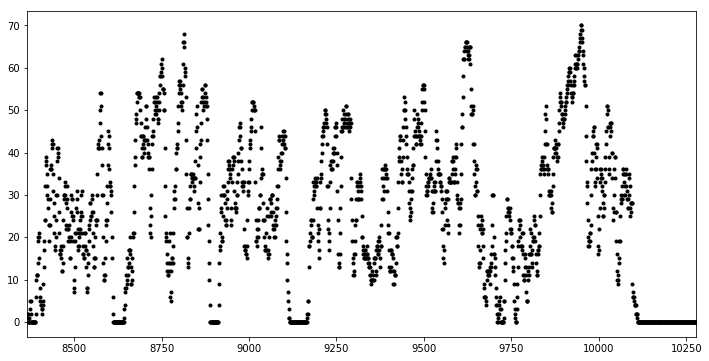

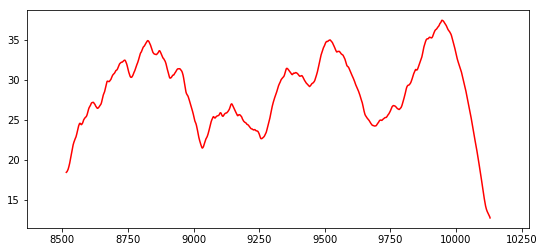

In [15]:
%matplotlib inline
trip_ts['speed'].plot(style='k.',figsize = (12,6))
pyplot.show()
r=trip_ts['speed'].rolling(window=300,center=True)
r.mean().plot(color='red',figsize = (9,4))
plt.show()

In [16]:
type(df_trip['accData'])

pandas.core.series.Series

In [17]:

def making_trips_alone(df,id_of_trip):
    df_trip = df[df['tripID']==id_of_trip]
    trip_ts['timestamp']=df_trip['timeStamp']
    trip_ts['speed']=df_trip['speed']
    return trip_ts

In [18]:
def analysis_of_trip(trip_ts,window_size):
    trip_ts.plot(color='gray')
    r=trip_ts.rolling(window=window_size,center=True)
    r.mean().plot(color='red')

## Analysis of each trip uniquely

In [19]:
trip_ts['Ticks'] = range(0,len(trip_ts.index.values))

In [20]:
trip_ts.head()

,timestamp,speed,Ticks
8365,2018-01-26 10:33:02,2.0,0
8366,2018-01-26 10:33:03,2.0,1
8367,2018-01-26 10:33:04,2.0,2
8368,2018-01-26 10:33:05,1.0,3
8369,2018-01-26 10:33:06,0.0,4


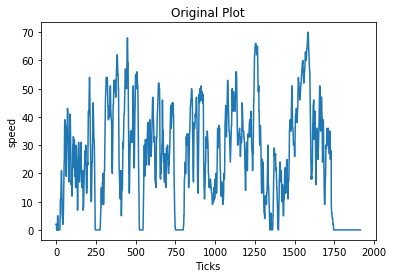

In [21]:

#very simple plotting
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('speed')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'speed', data = trip_ts);

## Sampled 

In [22]:
one_tenth = trip_ts.sample(frac = .1, random_state=np.random.randint(10))

In [23]:
one_tenth.head()

,timestamp,speed,Ticks
8752,2018-01-26 10:39:30,58.0,387
9627,2018-01-26 10:54:26,62.0,1262
9902,2018-01-26 10:59:02,49.0,1537
8882,2018-01-26 10:41:40,35.0,517
8514,2018-01-26 10:35:31,20.0,149


In [24]:
# removing index name
one_tenth.index.name = None
one_tenth = one_tenth.sort_values(by=['Ticks'], ascending=[True])
one_tenth.head()

,timestamp,speed,Ticks
8377,2018-01-26 10:33:14,2.0,12
8380,2018-01-26 10:33:17,0.0,15
8423,2018-01-26 10:34:00,32.0,58
8429,2018-01-26 10:34:06,19.0,64
8449,2018-01-26 10:34:26,30.0,84


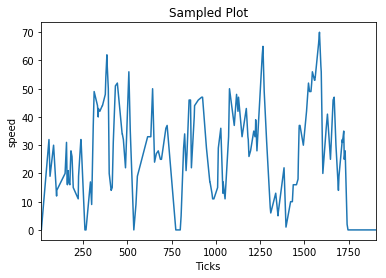

In [25]:
axes = one_tenth.plot('Ticks', 'speed', legend = False, title = 'Sampled Plot');
axes.legend = None;
axes.set_ylabel('speed');

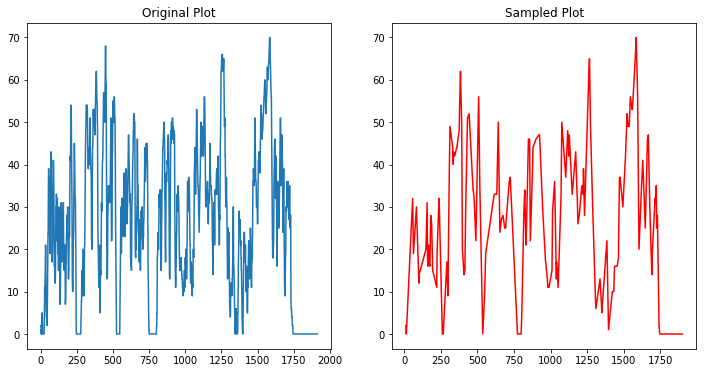

In [26]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6));
axes[0].plot('Ticks', 'speed', data = trip_ts);
axes[0].set_title('Original Plot');
axes[1].plot('Ticks', 'speed', data = one_tenth,color='red');
axes[1].set_title('Sampled Plot');

##  Smoothing of speed over per minute
### thats why taken windows of 60

In [27]:
trip_ts['Rolling_Mean'] = trip_ts['speed'].rolling(window = 60).mean()
trip_ts[70:80]


,timestamp,speed,Ticks,Rolling_Mean
8435,2018-01-26 10:34:12,36.0,70,14.633333
8436,2018-01-26 10:34:13,41.0,71,15.233333
8437,2018-01-26 10:34:14,43.0,72,15.916667
8438,2018-01-26 10:34:15,42.0,73,16.616667
8439,2018-01-26 10:34:16,42.0,74,17.316667
8440,2018-01-26 10:34:17,35.0,75,17.900000
8441,2018-01-26 10:34:18,31.0,76,18.416667
8442,2018-01-26 10:34:19,28.0,77,18.883333
8443,2018-01-26 10:34:20,25.0,78,19.300000
8444,2018-01-26 10:34:21,21.0,79,19.650000


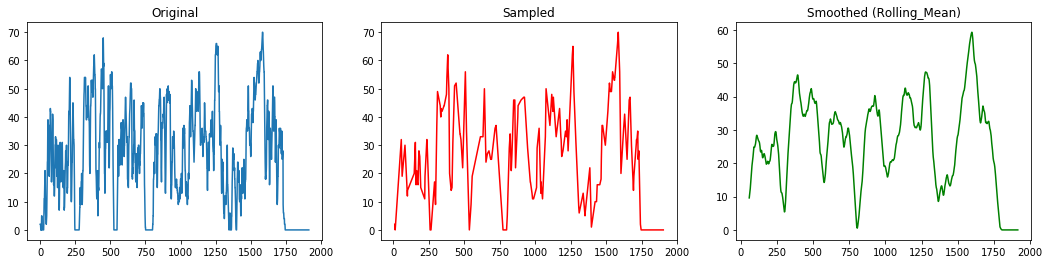

In [28]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18,4));
axes[0].plot('Ticks', 'speed', data = trip_ts);
axes[0].set_title('Original');
axes[1].plot('Ticks', 'speed', data = one_tenth,color='red');
axes[1].set_title('Sampled');
axes[2].plot('Ticks', 'Rolling_Mean', data = trip_ts,color='green');
axes[2].set_title('Smoothed (Rolling_Mean)');

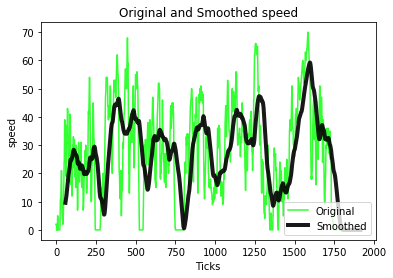

In [29]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(trip_ts['Ticks'], trip_ts['speed'], color = (0.2,1,0.2), label = 'Original');
ax.plot(trip_ts['Ticks'], trip_ts['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.set_title('Original and Smoothed speed')
ax.set_xlabel('Ticks')
ax.set_ylabel('speed')
ax.legend(loc='lower right');

## Analysis through Histogram
#### How many times driver has taken some particular speed in a trip

(array([ 413.,  322.,  335.,  383.,  253.,  150.,   59.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 7 Patch objects>)

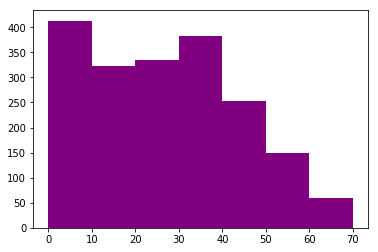

In [30]:
fig=plt.figure();
axs = plt.subplot(111);

# We can set the number of bins with the `bins` kwarg
axs.hist(trip_ts['speed'], bins=7,color='purple')

### Kernel Density plot

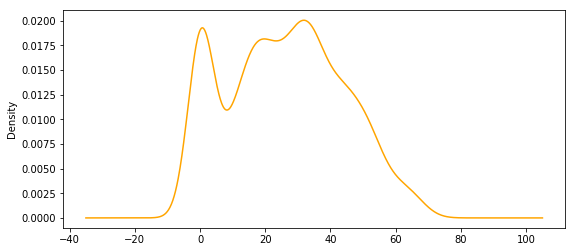

In [31]:

trip_ts['speed'].plot(kind='kde',color='orange',figsize = (9,4))
pyplot.show()

# Analysis through  time intervals
#### Whisker and Box plots for grouped data  
#### grouped for each minute in its journey that is what speed was he travelling on an average at that particular time stamp X axis is time stamp of minutes and Y axis is his speed 

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


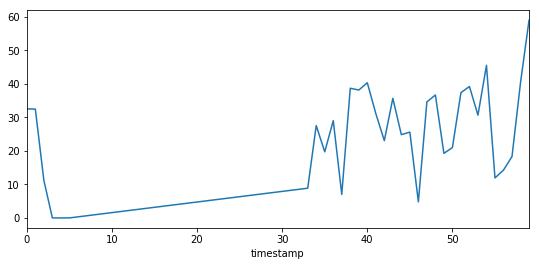

In [32]:
temp=trip_ts.iloc[:,[0,1]]
temp['timestamp'] =  pd.to_datetime(temp['timestamp'])
temp.groupby(temp['timestamp'].dt.minute).speed.mean().plot(figsize = (9,4))


In [33]:
trip_ts.iloc[:,[0,1]].groupby(temp['timestamp'].dt.minute).speed.value_counts().sort_values().head(10)

timestamp  speed
43         44.0     1
59         65.0     1
43         42.0     1
           40.0     1
           35.0     1
           26.0     1
           22.0     1
           15.0     1
42         35.0     1
           34.0     1
Name: speed, dtype: int64

## Analyzing max speed for each minute time interval to know overspeeding of journey

In [34]:
temp= temp.set_index(['timestamp'])

In [35]:
type(temp)

pandas.core.frame.DataFrame

In [36]:
#ticks = temp.ix[:, ['speed']]
bars1 = temp.speed.resample('min', how='max')
bars3 = temp.speed.resample('3min', how='max')
bars5 = temp.speed.resample('5min', how='max')

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  after removing the cwd from sys.path.


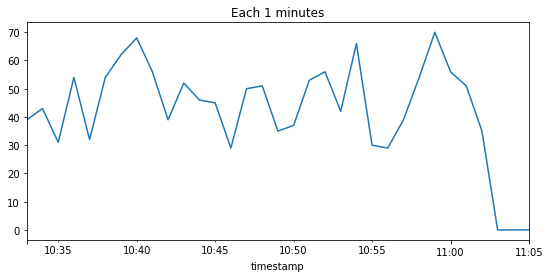

In [37]:
bars1.plot(title='Each 1 minutes',figsize = (9,4))

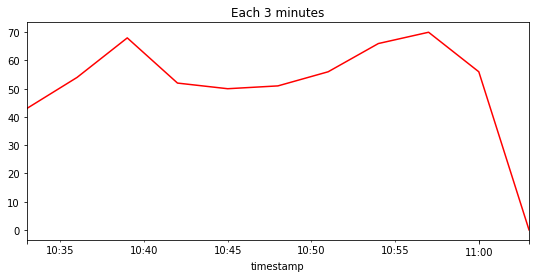

In [38]:
bars3.plot(title='Each 3 minutes',figsize = (9,4),color='red')

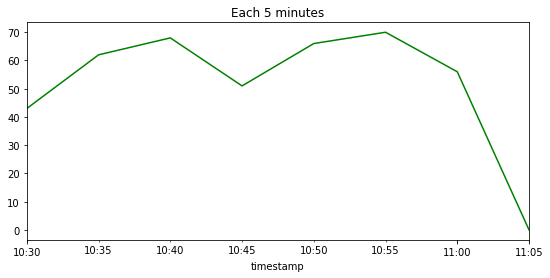

In [39]:
bars5.plot(title='Each 5 minutes',figsize = (9,4),color='green')

## Setting threshold value in the trip and counting average amount of time the driver  overspeeds certain given threshold value

In [40]:
threshold=60
count1=bars1[bars1.values>threshold].count()
percentage1=count1/(bars1.size)
print("percentage of time intervals the drivers has overspeed over time intervals of a minute :",(percentage1)*100)

percentage of time intervals the drivers has overspeed over time intervals of a minute : 12.1212121212


In [41]:
threshold=60
count3=bars3[bars3.values>threshold].count()
percentage3=count3/(bars3.size)
print("percentage of time intervals the drivers has overspeed over time intervals of 3 minutes :",(percentage3)*100)

percentage of time intervals the drivers has overspeed over time intervals of 3 minutes : 27.2727272727


In [42]:
threshold=60
count5=bars5[bars5.values>threshold].count()
percentage5=count5/(bars5.size)
print("percentage of time intervals the drivers has overspeed over time intervals of 5 minutes:",(percentage5)*100)

percentage of time intervals the drivers has overspeed over time intervals of 5 minutes: 50.0


## Trends analysis over acceleration
### Acceleration across X, Y, Z axis where X-axis is horizontal, Y- axis is vertical and Z-axis is the direction of movement of the vehicle.
### X axis will measure tilt and lane changes and Z will measure Hard break and Hard stop

In [43]:
df_trip['accData'].shape

(1915,)

## Converting Raw data to engineering units

In [44]:
# Convert Accelerometer reading to g units, 8bit data with a range of +-2g #
def convert_acc(x):
    x=int(str(x),16)
    if x>127:
        x = x-256
    return np.float64(x*0.01536)

# Convert a single row of Accelerometer data to engineering units and return a df #
def convert_acc_row(row):
    # Initially the data was gathered without magnetometer, so check length for identification #
    data_list = []
    for i in range(0, len(row), 6):
        x = convert_acc(row[i:i+2])
        y = convert_acc(row[i+2:i+4])
        z = convert_acc(row[i+4:i+6])
        
        data_list.append([x,y,z])
    return pd.DataFrame(columns=['ax','ay','az'], data=data_list)

df_trip['accData'] = df_trip['accData'].apply(convert_acc_row)
# Dropped the values for first second as the data is not collected completely #
#df_trip = df_trip.reset_index(drop=True)
#df_trip = df_trip.drop(0).reset_index(drop=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Calculating Rotation Matrix for vehicle

## Rotate Accelerometer values

In [45]:
def rotate_acc(row):
    A = np.array([[row['ax']], [row['ay']], [row['az']]])
    B = np.dot(R,A)
    return B[:,0]

acc_sample = df_trip['accData'].iloc[0]
acc_sample.apply(rotate_acc, axis=1)

NameError: ("name 'R' is not defined", 'occurred at index 0')

In [46]:
type(df_trip['accData'])

pandas.core.series.Series

In [47]:
temp_df= df_trip.iloc[:,[2,3,14]]
temp_df.head(10)

,timeStamp,accData,speed
8365,2018-01-26 10:33:02,ax ay az 0 0.06144 1.7...,2.0
8366,2018-01-26 10:33:03,ax ay az 0 0.06144 0.1...,2.0
8367,2018-01-26 10:33:04,ax ay az 0 0.06144 0.4...,2.0
8368,2018-01-26 10:33:05,ax ay az 0 0.06144 0.6...,1.0
8369,2018-01-26 10:33:06,ax ay az 0 0.06144 0.6...,0.0
8370,2018-01-26 10:33:07,ax ay az 0 0.04608 -0.2...,1.0
8371,2018-01-26 10:33:08,ax ay az 0 0.06144 0.6...,0.0
8372,2018-01-26 10:33:09,ax ay az 0 0.04608 -0.2...,0.0
8373,2018-01-26 10:33:10,ax ay az 0 0.04608 -1.5...,0.0
8374,2018-01-26 10:33:11,ax ay az 0 0.03072 -1.4...,3.0


In [48]:
type(temp_df['accData'])

pandas.core.series.Series

In [49]:
temp_df['accData'].values

array([          ax       ay       az
0   0.06144  1.72032 -0.04608
1   1.22880  0.03072 -1.22880
2   0.04608 -0.66048 -0.69120
3   0.04608 -0.61440 -0.76800
4   0.00000  0.00000  0.00000
5   0.00000  0.00000  0.00000
6   0.00000  0.00000  0.00000
7   0.00000  0.00000  0.00000
8   0.00000  0.00000  0.00000
9   0.00000  0.00000  0.00000
10  0.00000  0.00000  0.00000
11  0.00000  0.00000  0.00000
12  0.00000  0.00000  0.00000
13  0.00000  0.00000  0.00000
14  0.00000  0.00000  0.00000
15  0.00000  0.00000  0.00000
16  0.00000  0.00000  0.00000
17  0.00000  0.00000  0.00000
18  0.00000  0.00000  0.00000
19  0.00000  0.00000  0.00000
20  0.00000  0.00000  0.00000
21  0.00000  0.00000  0.00000
22  0.00000  0.00000  0.00000
23  0.00000  0.00000  0.00000
24  0.00000  0.00000  0.00000
25  0.00000  0.00000  0.00000
26  0.00000  0.00000  0.00000,
                ax       ay       az
0   0.06144  0.12288 -0.04608
1   0.73728  0.01536 -0.36864
2   0.04608 -0.64512 -0.75264
3   0.04608 -0.66048 -0.

In [50]:
t=temp_df['accData']
type(t)

pandas.core.series.Series

In [51]:
t.shape

(1915,)

## Calculating Trip time and Night Driving and Idling with Engine ON

In [55]:
import datetime as dt
start=temp_df['timeStamp'].values[0]
end=temp_df['timeStamp'].values[t.shape[0]-1]
start_dt = dt.datetime.strptime(start, '%Y-%m-%d %H:%M:%S')
end_dt = dt.datetime.strptime(end, '%Y-%m-%d %H:%M:%S')
diff = (end_dt - start_dt) 
diff.seconds/60
print('The trip time is for this journey in minutes {} \ntrip start time {}\ntrip end time is {}'.format(diff.seconds/60,start,end))

The trip time is for this journey in minutes 32.5 
trip start time 2018-01-26 10:33:02
trip end time is 2018-01-26 11:05:32


In [53]:
type(temp_df['timeStamp'].values[1])

str

In [83]:
count_daylight,count_night=0,0
for timestamp in temp_df.timeStamp.values:
        time = dt.datetime.strptime(timestamp, "%Y-%m-%d %H:%M:%S")
        hr, mi = (time.hour, time.minute)
        if hr>=7 and hr<18:
            count_daylight=count_daylight+1
        else:
            count_night=count_night+1
print("travel time in DayLight in minutes: {}\ntravel time in Night or Evening in minutes:{}".format(count_daylight/60,count_night/60))
print("percentage of time for trip when driving is done in daylight for whole trip: {} ".format((count_daylight/df_trip.shape[0])*100))
print("percentage of time for trip when driving is done in Night for whole trip: {} ".format((count_night/df_trip.shape[0])*100))

travel time in DayLight in minutes: 31.916666666666668
travel time in Night or Evening in minutes:0.0
percentage of time for trip when driving is done in daylight for whole trip: 100.0 
percentage of time for trip when driving is done in Night for whole trip: 0.0 


### Time Idling when Engine is ON

In [82]:
count_idle=0
for speed in temp_df.speed.values:
        if speed==0:
            count_idle=count_idle+1
print("Idle time for trip when Engine is ON in minutes: {} ".format(count_idle/60))
print("percentage of time for trip when Engine is ON for whole trip: {} ".format((count_idle/df_trip.shape[0])*100))

Idle time for trip when Engine is ON in minutes: 5.05 
percentage of time for trip when Engine is ON for whole trip: 15.822454308093995 


## Identifying Alerts on Battery and Diagnostic Trouble code

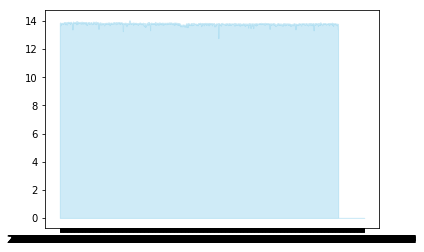

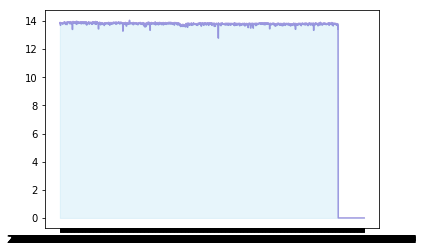

In [106]:
plt.fill_between( df_trip['timeStamp'],df_trip['battery'] , color="skyblue", alpha=0.4)
plt.show()
 
# Same, but add a stronger line on top (edge)
plt.fill_between(df_trip['timeStamp'],df_trip['battery'], color="skyblue", alpha=0.2)
plt.plot(df_trip['timeStamp'],df_trip['battery'], color="Slateblue", alpha=0.6)


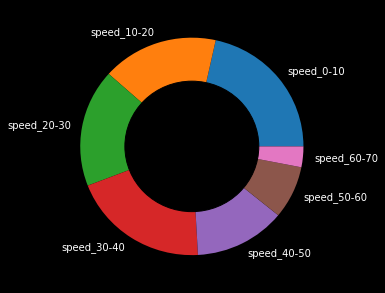

In [98]:
import matplotlib.pyplot as plt
 
# Data
names='speed_0-10', 'speed_10-20', 'speed_20-30', 'speed_30-40','speed_40-50','speed_50-60','speed_60-70',
size=[413,  322,  335,  383,  253,  150,   59]
 
# create a figure and set different background
fig = plt.figure(figsize=(5,5))
fig.patch.set_facecolor('black')
 
# Change color of text
plt.rcParams['text.color'] = 'white'
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.6, color='black')
 
# Pieplot + circle on it
plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


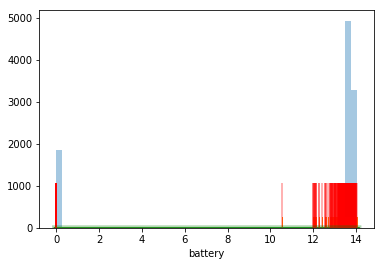

In [108]:
import seaborn as sns
 
# Hist only
sns.distplot( a=df["battery"], hist=True, kde=False, rug=False )
#sns.plt.show()
 
# Hist + Rug + kernel density
sns.distplot( a=df["battery"], hist=True, kde=True, rug=True )
#sns.plt.show()
 
# To change parameters of rug
sns.distplot( a=df["battery"], rug=True,
rug_kws={"color": "r", "alpha":0.3, "linewidth": 2, "height":0.2 }
)
 
# To change parameters of density distribution
sns.distplot( a=df["battery"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 5, "shade":True }
)


In [117]:
diagnostic_trouble_codes=df['dtc'].value_counts()
diagnostic_trouble_codes = df['dtc'].value_counts().to_dict()
#print counts
print(diagnostic_trouble_codes)

{0.0: 10280}


In [118]:
battery_alert=df['battery'].value_counts()
battery_alert = df['battery'].value_counts().to_dict()
#print counts
print(battery_alert)

{0.0: 1865, 13.808999999999999: 210, 13.73: 196, 13.720999999999998: 194, 13.773999999999999: 190, 13.734999999999999: 186, 13.77: 184, 13.794: 184, 13.798999999999999: 181, 13.779000000000002: 180, 13.76: 179, 13.765000000000001: 178, 13.755000000000001: 176, 13.744999999999999: 171, 13.804: 165, 13.813000000000001: 165, 13.711: 163, 13.74: 163, 13.789: 158, 13.726000000000001: 155, 13.827999999999999: 155, 13.823: 154, 13.784000000000001: 154, 13.818: 151, 13.686999999999999: 141, 13.706: 138, 13.715999999999999: 136, 13.691000000000001: 136, 13.696: 136, 13.701000000000001: 135, 13.75: 135, 13.651999999999999: 130, 13.677: 121, 13.682: 119, 13.833: 117, 13.657: 109, 13.672000000000001: 109, 13.662000000000001: 103, 13.837999999999999: 100, 13.632999999999999: 98, 13.843: 97, 13.848000000000001: 92, 13.856999999999999: 87, 13.667: 84, 13.647: 83, 13.622999999999999: 82, 13.638: 81, 13.872: 81, 13.643000000000001: 79, 13.862: 74, 13.853: 72, 13.867000000000001: 70, 13.613: 62, 13.8770

## Setting Threshold Minimum value for battery and creating alert for driver for which time period in battery level is low

In [123]:
threshold_min_value_for_battery=13.00
count_battery_alert=0
for i in df_trip.battery.values:
        if i<threshold_min_value_for_battery:
            count_battery_alert=count_battery_alert+1
print("time for trip when battery value is low  in minutes: {} ".format(count_battery_alert/60))
print("percentage of time for trip when battery value is low for whole trip: {} ".format((count_battery_alert/df_trip.shape[0])*100))

time for trip when battery value is low  in minutes: 2.75 
percentage of time for trip when battery value is low for whole trip: 8.616187989556137 


In [138]:
timestamp_at_min_battery=df_trip.loc[df_trip['battery'] < 13, 'timeStamp']
print("timestamp at alert for minimum battery level",timestamp_at_min_battery)
type(timestamp_at_min_battery)

timestamp at alert for minimum battery level 9361     2018-01-26 10:49:59
10116    2018-01-26 11:02:49
10117    2018-01-26 11:02:50
10118    2018-01-26 11:02:51
10119    2018-01-26 11:02:52
10120    2018-01-26 11:02:53
10121    2018-01-26 11:02:54
10122    2018-01-26 11:02:55
10123    2018-01-26 11:02:56
10124    2018-01-26 11:02:57
10125    2018-01-26 11:02:58
10126    2018-01-26 11:02:59
10127    2018-01-26 11:03:00
10128    2018-01-26 11:03:01
10129    2018-01-26 11:03:02
10130    2018-01-26 11:03:03
10131    2018-01-26 11:03:04
10132    2018-01-26 11:03:05
10133    2018-01-26 11:03:06
10134    2018-01-26 11:03:07
10135    2018-01-26 11:03:08
10136    2018-01-26 11:03:09
10137    2018-01-26 11:03:10
10138    2018-01-26 11:03:11
10139    2018-01-26 11:03:12
10140    2018-01-26 11:03:13
10141    2018-01-26 11:03:14
10142    2018-01-26 11:03:15
10143    2018-01-26 11:03:16
10144    2018-01-26 11:03:17
                ...         
10250    2018-01-26 11:05:03
10251    2018-01-26 11:05:0

pandas.core.series.Series

In [144]:
start_battery=timestamp_at_min_battery.values[0]
end_battery=timestamp_at_min_battery.values[timestamp_at_min_battery.shape[0]-1]
start_dt_battery = dt.datetime.strptime(start_battery, '%Y-%m-%d %H:%M:%S')
end_dt_battery= dt.datetime.strptime(end_battery, '%Y-%m-%d %H:%M:%S')
diff_battery = (end_dt_battery - start_dt_battery) 
diff_battery.seconds/60
print('The trip time is for Battery below threshold value in minutes {} \nstart time of alert {}\nend time of alert is {}'.format(diff_battery.seconds/60,start_battery,end_battery))

The trip time is for Battery below threshold value in minutes 15.55 
start time of alert 2018-01-26 10:49:59
end time of alert is 2018-01-26 11:05:32


### Acceleration dataframe

In [225]:
df_acc_data = pd.DataFrame(data={'a_x':1.5*np.random.randn(df_trip.shape[0]), 'a_y':1.1*np.random.randn(df_trip.shape[0]),'a_z':1.2*np.random.randn(df_trip.shape[0])})

In [237]:
df_acc_data['timestamp'] = trip_ts['timestamp']

In [223]:
df_acc_data.describe()

,a_x,a_y,a_z
count,1915.000000,1915.000000,1915.000000
mean,-0.046056,-0.006469,-0.000705
std,1.509108,1.089913,1.187229
min,-5.706916,-3.899304,-3.469140
25%,-1.066420,-0.734101,-0.794781
50%,-0.016972,-0.005929,0.004055
75%,0.966013,0.718856,0.800756
max,4.418715,3.837583,3.365956


In [232]:
df_acc_data['ticks'] = range(0,len(df_acc_data.index.values))

In [229]:
df_acc_data['Rolling_Mean_x'] = df_acc_data['a_x'].rolling(window = 60).mean()
df_acc_data['Rolling_Mean_y'] = df_acc_data['a_y'].rolling(window = 60).mean()
df_acc_data['Rolling_Mean_z'] = df_acc_data['a_z'].rolling(window = 60).mean()

In [230]:
df_acc_data[61:66]

,a_x,a_y,a_z,Rolling_Mean_x,Rolling_Mean_y,Rolling_Mean_z
61,-1.743820,1.264260,-1.038412,-0.198978,-0.029396,0.021687
62,-0.878786,0.976392,-0.760947,-0.245363,-0.002390,-0.002241
63,-1.159944,-0.368729,-0.852580,-0.217237,0.011489,0.007396
64,-0.696976,1.040654,-1.813557,-0.227028,0.023758,-0.050172
65,0.738387,-0.076023,0.241206,-0.199898,0.019119,-0.060660


## Smoothed acceleration over Z axis

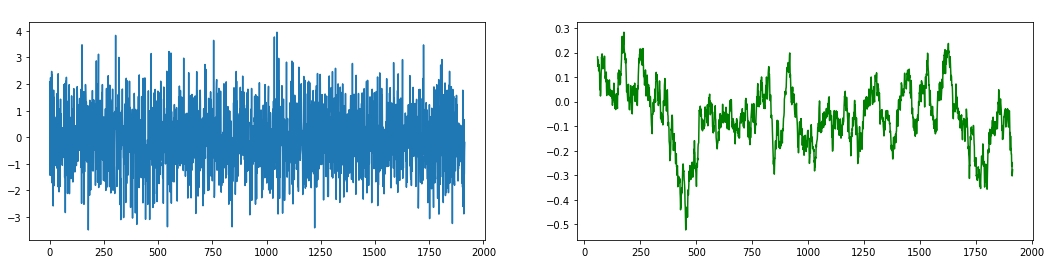

In [207]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,4));
axes[0].plot('ticks', 'a_z', data = df_acc_data);
axes[0].set_title('Original');
axes[1].plot('ticks', 'Rolling_Mean_z', data = df_acc_data,color='green');
axes[1].set_title('Smoothed (Rolling_Mean)');

## Smoothed acceleration over Y axis

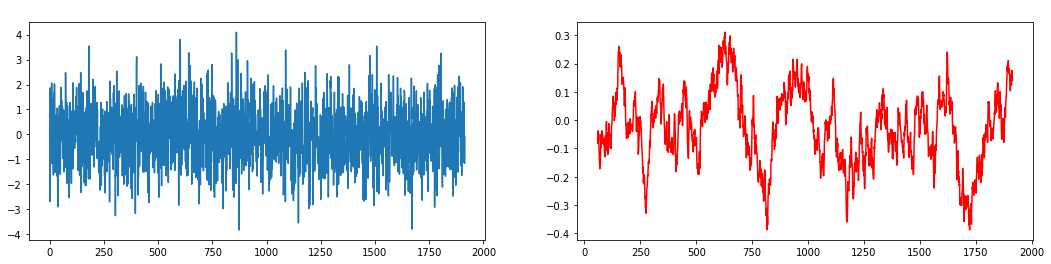

In [208]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,4));
axes[0].plot('ticks', 'a_y', data = df_acc_data);
axes[0].set_title('Original');
axes[1].plot('ticks', 'Rolling_Mean_y', data = df_acc_data,color='red');
axes[1].set_title('Smoothed (Rolling_Mean)');

## Smoothed acceleration over X axis

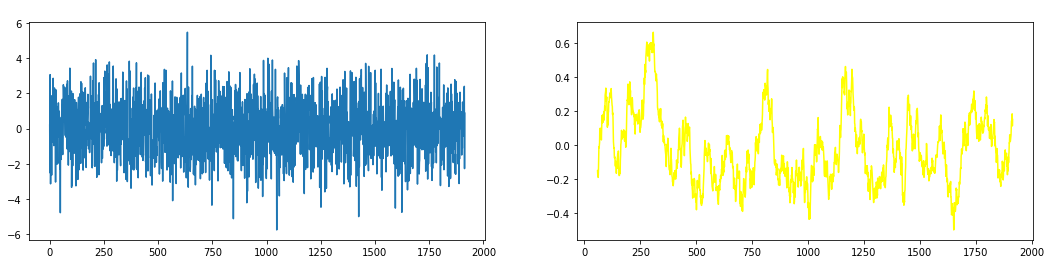

In [209]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,4));
axes[0].plot('ticks', 'a_x', data = df_acc_data);
axes[0].set_title('Original');
axes[1].plot('ticks', 'Rolling_Mean_x', data = df_acc_data,color='yellow');
axes[1].set_title('Smoothed (Rolling_Mean)');

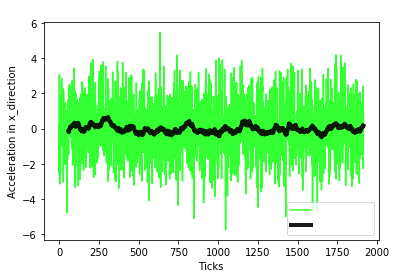

In [210]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(df_acc_data['ticks'], df_acc_data['a_x'], color = (0.2,1,0.2), label = 'Original');
ax.plot(df_acc_data['ticks'], df_acc_data['Rolling_Mean_x'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.set_title('Original and Smoothed speed')
ax.set_xlabel('Ticks')
ax.set_ylabel('Acceleration in x_direction')
ax.legend(loc='lower right');

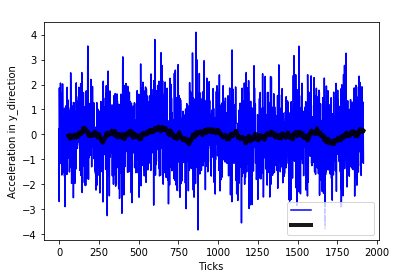

In [211]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(df_acc_data['ticks'], df_acc_data['a_y'], color = (0,0,1), label = 'Original');
ax.plot(df_acc_data['ticks'], df_acc_data['Rolling_Mean_y'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.set_title('Original and Smoothed speed')
ax.set_xlabel('Ticks')
ax.set_ylabel('Acceleration in y_direction')
ax.legend(loc='lower right');

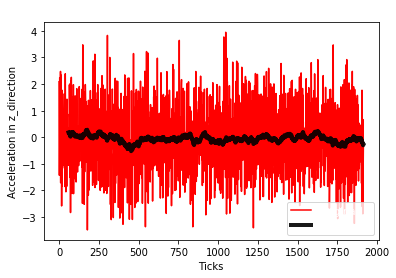

In [212]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(df_acc_data['ticks'], df_acc_data['a_z'], color = (1,0,0), label = 'Original');
ax.plot(df_acc_data['ticks'], df_acc_data['Rolling_Mean_z'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.set_title('Original and Smoothed speed')
ax.set_xlabel('Ticks')
ax.set_ylabel('Acceleration in z_direction')
ax.legend(loc='lower right');

(array([   1.,    2.,   21.,   92.,  321.,  568.,  553.,  261.,   86.,   10.]),
 array([-5.61624212, -4.67051258, -3.72478304, -2.7790535 , -1.83332395,
        -0.88759441,  0.05813513,  1.00386467,  1.94959421,  2.89532376,
         3.8410533 ]),
 <a list of 10 Patch objects>)

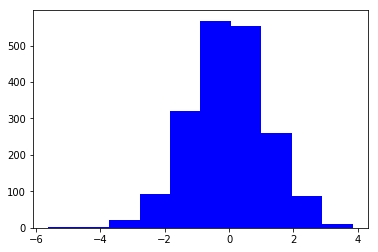

In [227]:
fig=plt.figure();
axs = plt.subplot(111);

# We can set the number of bins with the `bins` kwarg
axs.hist(df_acc_data['a_z'], bins=10,color='blue')

## Analyzing max Acceleration for each minute time interval to know Hard acceleration/Rash driving of journey

In [260]:
df_acc_data[61:66]

,a_x,a_y,a_z,Rolling_Mean_x,Rolling_Mean_y,Rolling_Mean_z,ticks
timestamp,,,,,,,
2018-01-26 10:34:03,-1.743820,1.264260,-1.038412,-0.198978,-0.029396,0.021687,61
2018-01-26 10:34:04,-0.878786,0.976392,-0.760947,-0.245363,-0.002390,-0.002241,62
2018-01-26 10:34:05,-1.159944,-0.368729,-0.852580,-0.217237,0.011489,0.007396,63
2018-01-26 10:34:06,-0.696976,1.040654,-1.813557,-0.227028,0.023758,-0.050172,64
2018-01-26 10:34:07,0.738387,-0.076023,0.241206,-0.199898,0.019119,-0.060660,65


In [250]:
df_acc_data = df_acc_data.reset_index(drop=True)
trip_ts = trip_ts.reset_index(drop=True)

In [251]:
df_acc_data.timestamp=trip_ts.timestamp

In [255]:
df_acc_data= df_acc_data.set_index(['timestamp'])

In [268]:
df_acc_data.index = pd.to_datetime(df_acc_data.index, unit='ns')

In [306]:
bars1_z = df_acc_data.a_z.resample('min').max()
bars3_z = df_acc_data.a_z.resample('3min').max()
bars5_z = df_acc_data.a_z.resample('5min').max()

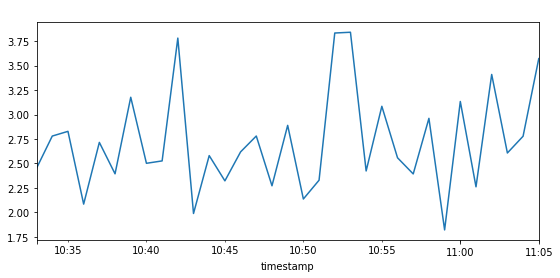

In [307]:
bars1_z.plot(title='Each 1 minutes',figsize = (9,4))

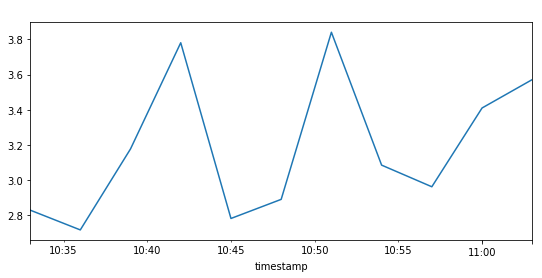

In [308]:
bars3_z.plot(title='Each 3 minutes',figsize = (9,4))

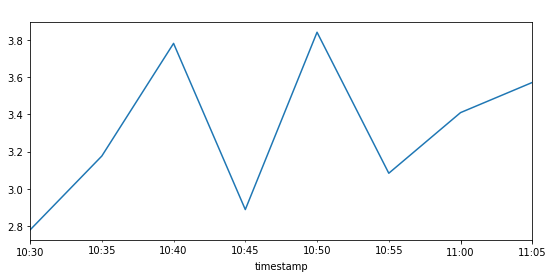

In [309]:
bars5_z.plot(title='Each 5 minutes',figsize = (9,4))

In [310]:
threshold=3.4
count1=bars1_z[bars1_z.values>threshold].count()
percentage1_z=count1/(bars1_z.size)
print("percentage of time intervals the drivers has hard brake/hard acceleration over time intervals of a minute :",(percentage1_z)*100)

percentage of time intervals the drivers has hard brake/hard acceleration over time intervals of a minute : 15.1515151515


In [311]:
threshold=3.4
count3=bars3[bars3_z.values>threshold].count()
percentage3_z=count3/(bars3_z.size)
print("percentage of time intervals the drivers has hard brake/hard acceleration over time intervals of a three minute :",(percentage3_z)*100)

percentage of time intervals the drivers has hard brake/hard acceleration over time intervals of a three minute : 36.3636363636


In [312]:
threshold=3.4
count5=bars5_z[bars5_z.values>threshold].count()
percentage5_z=count5/(bars5_z.size)
print("percentage of time intervals the drivers has hard brake/hard acceleration over time intervals of a five minute :",(percentage5_z)*100)

percentage of time intervals the drivers has hard brake/hard acceleration over time intervals of a five minute : 50.0


## Identifying lane changes partially

In [313]:
bars1_y = df_acc_data.a_y.resample('min').max()
bars3_y = df_acc_data.a_y.resample('3min').max()
bars5_y = df_acc_data.a_y.resample('5min').max()

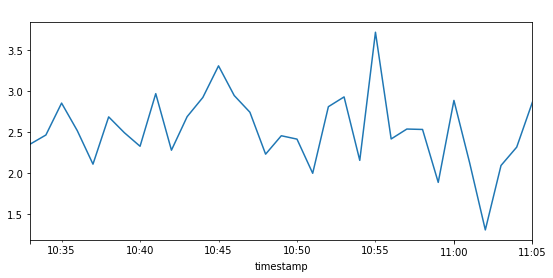

In [314]:
bars1_y.plot(title='Each 1 minutes',figsize = (9,4))

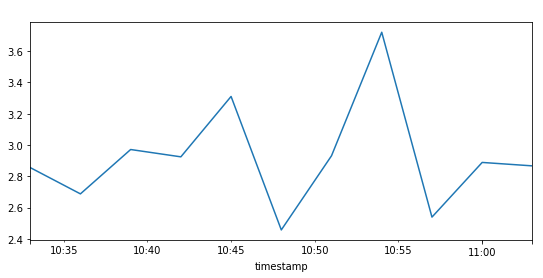

In [316]:
bars3_y.plot(title='Each 3 minutes',figsize = (9,4))

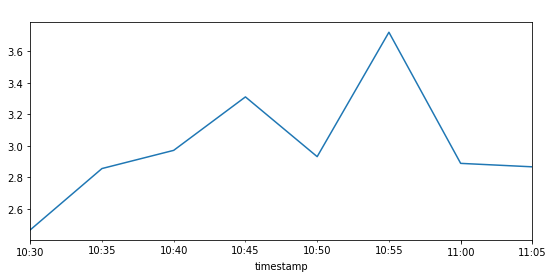

In [317]:
bars5_y.plot(title='Each 5 minutes',figsize = (9,4))

In [320]:
threshold=3.6
count1=bars1_y[bars1_y.values>threshold].count()
percentage1_y=count1/(bars1_y.size)
print("percentage of time intervals the drivers has hard brake/hard acceleration in lane changes over time intervals of a minute :",(percentage1_y)*100)

percentage of time intervals the drivers has hard brake/hard acceleration in lane changes over time intervals of a minute : 3.0303030303


In [321]:
threshold=3.6
count3=bars3_y[bars3_y.values>threshold].count()
percentage3_y=count3/(bars3_y.size)
print("percentage of time intervals the drivers has hard brake/hard acceleration in lane changes over time intervals of a three minute :",(percentage3_y)*100)

percentage of time intervals the drivers has hard brake/hard acceleration in lane changes over time intervals of a three minute : 9.09090909091


In [322]:
threshold=3.6
count5=bars5_y[bars5_y.values>threshold].count()
percentage5_y=count5/(bars5_y.size)
print("percentage of time intervals the drivers has hard brake/hard acceleration in lane changes over time intervals of a five minute :",(percentage5_y)*100)

percentage of time intervals the drivers has hard brake/hard acceleration in lane changes over time intervals of a five minute : 12.5


# DRIVER REPORT CARD

## TRIP SUMMARY
- TRIP DURATION 
- TRIP START TIME 
- TRIP END TIME
- TRIP NOTES

In [277]:
print('The trip time is for this journey in minutes {} \ntrip start time {}\ntrip end time is {}'.format(diff.seconds/60,start,end))

The trip time is for this journey in minutes 32.5 
trip start time 2018-01-26 10:33:02
trip end time is 2018-01-26 11:05:32


### Night driving vs daylight driving

In [279]:
print("travel time in DayLight in minutes: {}\ntravel time in Night or Evening in minutes:{}".format(count_daylight/60,count_night/60))
print("percentage of time for trip when driving is done in daylight for whole trip: {} ".format((count_daylight/df_trip.shape[0])*100))
print("percentage of time for trip when driving is done in Night for whole trip: {} ".format((count_night/df_trip.shape[0])*100))

travel time in DayLight in minutes: 31.916666666666668
travel time in Night or Evening in minutes:0.0
percentage of time for trip when driving is done in daylight for whole trip: 100.0 
percentage of time for trip when driving is done in Night for whole trip: 0.0 


## Idling when engine is ON

In [280]:
print("Idle time for trip when Engine is ON in minutes: {} ".format(count_idle/60))
print("percentage of time for trip when Engine is ON for whole trip: {} ".format((count_idle/df_trip.shape[0])*100))

Idle time for trip when Engine is ON in minutes: 5.05 
percentage of time for trip when Engine is ON for whole trip: 15.822454308093995 


# ALERTS
- Diagnostic trouble code
- Battery Alert

In [281]:
print("time for trip when battery value is low  in minutes: {} ".format(count_battery_alert/60))
print("percentage of time for trip when battery value is low for whole trip: {} ".format((count_battery_alert/df_trip.shape[0])*100))

time for trip when battery value is low  in minutes: 2.75 
percentage of time for trip when battery value is low for whole trip: 8.616187989556137 


In [282]:
start_battery=timestamp_at_min_battery.values[0]
end_battery=timestamp_at_min_battery.values[timestamp_at_min_battery.shape[0]-1]
start_dt_battery = dt.datetime.strptime(start_battery, '%Y-%m-%d %H:%M:%S')
end_dt_battery= dt.datetime.strptime(end_battery, '%Y-%m-%d %H:%M:%S')
diff_battery = (end_dt_battery - start_dt_battery) 
diff_battery.seconds/60
print('The trip time is for Battery below threshold value in minutes {} \nstart time of alert {}\nend time of alert is {}'.format(diff_battery.seconds/60,start_battery,end_battery))

The trip time is for Battery below threshold value in minutes 15.55 
start time of alert 2018-01-26 10:49:59
end time of alert is 2018-01-26 11:05:32


### Diagnostic Trouble code alert

In [283]:
print(diagnostic_trouble_codes)

{0.0: 10280}


# EVENT SUMMARY
- OVER SPEEDING 
- HARD ACCELERATION
- HARD STOP
- LANE CHANGES

In [323]:
print("percentage of time intervals the drivers has overspeed over time intervals of a minute :",(percentage1)*100)

percentage of time intervals the drivers has overspeed over time intervals of a minute : 3.0303030303


In [326]:
print("percentage of time intervals the drivers has hard brake/hard acceleration over time intervals of a  minute :",(percentage1_z)*100)

percentage of time intervals the drivers has hard brake/hard acceleration over time intervals of a  minute : 15.1515151515


In [325]:
print("percentage of time intervals the drivers has hard brake/hard acceleration over time intervals for lane changes of a minute :",(percentage1_y)*100)

percentage of time intervals the drivers has hard brake/hard acceleration over time intervals for lane changes of a minute : 3.0303030303


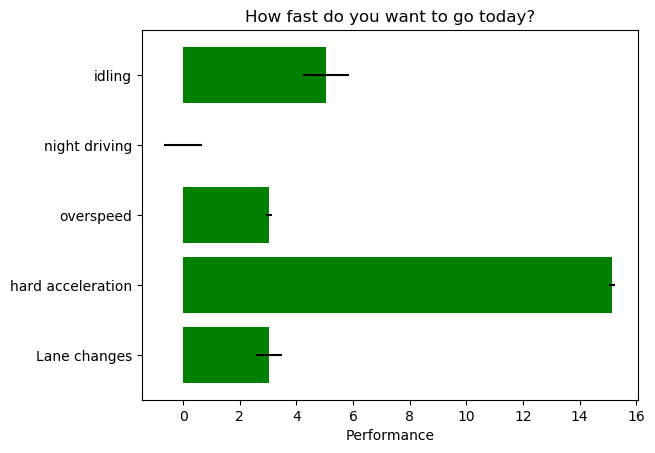

In [338]:
performance = []
performance.append((count_idle/60))
performance.append((count_night/df_trip.shape[0])*100)
performance.append((percentage1)*100)
performance.append((percentage1_z)*100)
performance.append((percentage1_y)*100)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('idling', 'night driving', 'overspeed', 'hard acceleration', 'Lane changes')
y_pos = np.arange(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()